<a href="https://colab.research.google.com/github/KhamdGek/ML-W-PYTHON/blob/master/ML_assignment1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> #    **DESCISION TREE VS. RANDOM FOREST ON Car Evaluation Data Set**




# Objective

Data is to be imported from UCI ML repository for Car evaluation Datasheet.  The Datasheet is to be shuffled and stored in three different arrays. Descision Tree Classifier and Random Forest classifer are to be applied on theses three data array which are shuffled. EAch result is sumed and averaged to get the accuracy of the model and train/test set. Finally, confision matrix and classification matrix are applied and T-test. 

# **LIBRARY IMPORT**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns     
sns.set()
import io
import random
from random import shuffle
from sklearn.model_selection import train_test_split # for data splitting 70%/30%
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # import Random Forest classifier
from sklearn.metrics import confusion_matrix #for printing and display of confusion matrix
from sklearn.metrics import classification_report #for printing and display of classification report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
!pip install category_encoders
import category_encoders as ce # import category encoders for converting objective data to int



     |████████████████████████████████| 81kB 3.4MB/s 


# **DATA IMPORT**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving car.csv to car.csv


# **DATA CLEANING**

1. REMOVING SOME NON IMPORTANT COLOMNS. 
2. SPLITTING THE DATA INTO TRAIN TEST WITH 70/30
3. RANDOM SHUFFLING THE DATA AND STORING INTO THREE STIRNGS

In [5]:
Dataset1 = pd.read_csv(io.BytesIO(uploaded['car.csv']))
Dataset1.shape

(1728, 7)

In [6]:
Dataset1.drop(Dataset1.columns[9:],axis=1,inplace=True)
col_names = ['BUYING', 'MAINT', 'DOORS', 'PERSONS', 'LUG_BOOT', 'SAFETY', 'CLASS']
Dataset1.columns = col_names
col_names
Dataset1.head() 

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
Dataset1['CLASS'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: CLASS, dtype: int64

# **DATA SHUFFLING**

In [8]:
# check missing values in variables
Dataset1.isnull().sum()

shuffled_Dataset = Dataset1.sample(frac=1)
shuffled_Dataset2 = Dataset1.sample(frac=1)
shuffled_Dataset3 = Dataset1.sample(frac=1)
shuffled_Dataset.to_csv("car1.csv", index=False)
shuffled_Dataset2.to_csv("car2.csv", index=False)
shuffled_Dataset3.to_csv("car3.csv", index=False)
Dataset1=pd.read_csv("car1.csv")
Dataset2=pd.read_csv("car2.csv")
Dataset3=pd.read_csv("car3.csv")


In [10]:
Dataset1.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,high,low,5more,more,small,low,unacc
1,med,med,5more,2,small,low,unacc
2,vhigh,vhigh,5more,4,small,low,unacc
3,high,med,3,2,small,low,unacc
4,high,med,2,2,med,high,unacc


In [11]:
Dataset2.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,vhigh,med,2,more,small,med,unacc
1,vhigh,vhigh,4,more,big,low,unacc
2,low,vhigh,2,4,small,med,unacc
3,vhigh,low,5more,more,med,low,unacc
4,vhigh,low,5more,more,big,med,acc


In [12]:
Dataset3.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,low,high,3,more,big,high,vgood
1,med,vhigh,2,more,med,high,acc
2,med,high,2,4,small,high,acc
3,high,low,5more,2,med,high,unacc
4,vhigh,low,2,4,med,med,unacc


# **NON-IMPORTANT COLOMN REMOVAL TO IMPROVE ACCURACY**

In [13]:
X = Dataset1.drop(['CLASS',], axis=1)
y = Dataset1['CLASS']

In [14]:
X2 = Dataset2.drop(['CLASS'], axis=1)
y2 = Dataset2['CLASS']

In [15]:
X3 = Dataset3.drop(['CLASS'], axis=1)
y3 = Dataset3['CLASS']

# **TRAIN/TEST SPLIT INTO 70/30 RATIO**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.30, random_state = 42)
X_train2.shape, X_test2.shape

((1209, 6), (519, 6))

In [18]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.30, random_state = 42)
X_train3.shape, X_test3.shape

((1209, 6), (519, 6))

In [19]:
X_train3.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY
1178,high,med,5more,2,big,low
585,med,high,4,2,med,high
1552,low,low,3,more,big,high
1169,high,med,5more,more,med,med
1033,low,high,5more,2,med,low


# **CONVERSION OF STING TO INT IN DATA**

In [20]:

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['BUYING', 'MAINT', 'PERSONS', 'LUG_BOOT', 'SAFETY','DOORS'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train2 = encoder.fit_transform(X_train2)
X_test2 = encoder.transform(X_test2)
X_train3 = encoder.fit_transform(X_train3)
X_test3 = encoder.transform(X_test3)

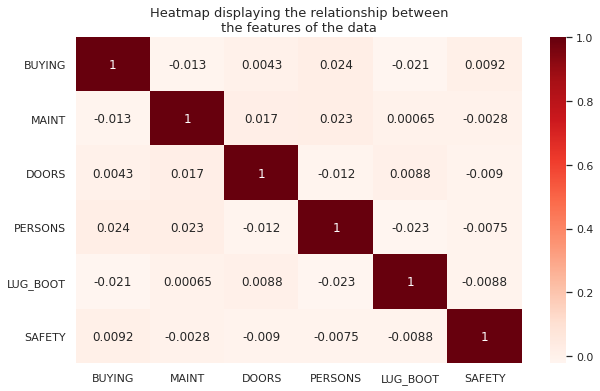

In [21]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and the other features. 
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

# **Decision Tree Classifier**

# Decision Tree Classifier **MODEL FITTING**

In [142]:

# instantiate the DecisionTreeClassifier model with criterion gini index
DTC_ENT = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
# fit the model
DTC_ENT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [143]:
# instantiate the DecisionTreeClassifier model with criterion gini index
DTC_ENT2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
# fit the model
DTC_ENT2.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [144]:
# instantiate the DecisionTreeClassifier model with criterion gini index
DTC_ENT3 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
# fit the model
DTC_ENT3.fit(X_train3, y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [145]:
y_pred_gini = DTC_ENT.predict(X_test)
y_pred_gini2 = DTC_ENT2.predict(X_test2)
y_pred_gini3 = DTC_ENT3.predict(X_test3)
y_pred_train_gini = DTC_ENT.predict(X_train)
y_pred_train_gini2 = DTC_ENT2.predict(X_train2)
y_pred_train_gini3 = DTC_ENT3.predict(X_train3)


In [146]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106   1   8   0]
 [  3  14   0   1]
 [ 13   0 351   0]
 [  4   1   0  17]]


In [147]:
cm = confusion_matrix(y_test2, y_pred_gini2)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[109   1   3   0]
 [  1  12   0   1]
 [ 16   2 358   0]
 [  1   0   0  15]]


In [148]:
cm = confusion_matrix(y_test3, y_pred_gini3)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[103   1   7   2]
 [  8   6   0   1]
 [ 10   0 364   0]
 [  0   0   0  17]]


# **CLASSIFICATION REPORT** FOR DESCISION TREE

In [149]:

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.84      0.92      0.88       115
        good       0.88      0.78      0.82        18
       unacc       0.98      0.96      0.97       364
       vgood       0.94      0.77      0.85        22

    accuracy                           0.94       519
   macro avg       0.91      0.86      0.88       519
weighted avg       0.94      0.94      0.94       519



In [150]:
print(classification_report(y_test2, y_pred_gini2))

              precision    recall  f1-score   support

         acc       0.86      0.96      0.91       113
        good       0.80      0.86      0.83        14
       unacc       0.99      0.95      0.97       376
       vgood       0.94      0.94      0.94        16

    accuracy                           0.95       519
   macro avg       0.90      0.93      0.91       519
weighted avg       0.96      0.95      0.95       519



In [151]:
print(classification_report(y_test3, y_pred_gini3))

              precision    recall  f1-score   support

         acc       0.85      0.91      0.88       113
        good       0.86      0.40      0.55        15
       unacc       0.98      0.97      0.98       374
       vgood       0.85      1.00      0.92        17

    accuracy                           0.94       519
   macro avg       0.88      0.82      0.83       519
weighted avg       0.94      0.94      0.94       519



# **RANDOM FOREST CLASSIFIER**

# RANDOM FOREST **MODEL FITTING**

In [218]:

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100,max_depth=13,random_state=0,min_samples_split=2)
rfc2 = RandomForestClassifier(n_estimators=100,max_depth=13,random_state=0, min_samples_split=2)
rfc3 = RandomForestClassifier(n_estimators=100,max_depth=13,random_state=0, min_samples_split=2)
# fit the model
rfc.fit(X_train, y_train)
rfc2.fit(X_train2, y_train2)
rfc3.fit(X_train3, y_train3)
# Predict the Test set results
y_pred = rfc.predict(X_test)
y_pred2 = rfc2.predict(X_test2)
y_pred3 = rfc3.predict(X_test3)


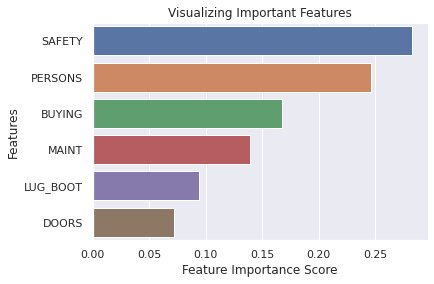

In [219]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# **CONFUSION MATRIX** OF RANDOM FOREST

In [220]:
cm4 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm4)

Confusion matrix

 [[109   0   6   0]
 [  9   9   0   0]
 [ 10   0 354   0]
 [  4   2   0  16]]


In [221]:
cm5 = confusion_matrix(y_test2, y_pred2)
print('Confusion matrix\n\n', cm5)

Confusion matrix

 [[110   1   2   0]
 [  1  13   0   0]
 [ 11   2 363   0]
 [  2   0   0  14]]


In [222]:
cm6 = confusion_matrix(y_test3, y_pred3)
print('Confusion matrix\n\n', cm6)

Confusion matrix

 [[106   0   7   0]
 [  8   6   0   1]
 [ 10   0 364   0]
 [  2   1   0  14]]


# **CLASSIFICATION REPORT** FOR RANDOM FOREST

In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.83      0.95      0.88       115
        good       0.82      0.50      0.62        18
       unacc       0.98      0.97      0.98       364
       vgood       1.00      0.73      0.84        22

    accuracy                           0.94       519
   macro avg       0.91      0.79      0.83       519
weighted avg       0.94      0.94      0.94       519



In [224]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

         acc       0.89      0.97      0.93       113
        good       0.81      0.93      0.87        14
       unacc       0.99      0.97      0.98       376
       vgood       1.00      0.88      0.93        16

    accuracy                           0.96       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.96      0.96       519



In [225]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

         acc       0.84      0.94      0.89       113
        good       0.86      0.40      0.55        15
       unacc       0.98      0.97      0.98       374
       vgood       0.93      0.82      0.87        17

    accuracy                           0.94       519
   macro avg       0.90      0.78      0.82       519
weighted avg       0.95      0.94      0.94       519



# **CONCLUSION**
Comparing the results of both Descision Tree and Random Forest. 
Descision tree gives same accuracy as Random Forest model accuacy but Random forest also showed promising result in train set accuracy compared to descision tree classifier.

In [226]:
from sklearn.metrics import accuracy_score
number_list1 = [DTC_ENT.score(X_train, y_train),DTC_ENT2.score(X_train2, y_train2),DTC_ENT3.score(X_train3, y_train3)]
avg_train = sum(number_list1)/len(number_list1)
print("The average Train set score for Descision tree is ", round(avg_train,2))
number_list2 = [DTC_ENT.score(X_test, y_test),DTC_ENT2.score(X_test2, y_test2),DTC_ENT3.score(X_test3, y_test3)]
avg_test = sum(number_list2)/len(number_list2)
print("The average Test set score for Descision tree is ", round(avg_test,2))
number_list3 = [accuracy_score(y_test, y_pred_gini),accuracy_score(y_test2, y_pred_gini2),accuracy_score(y_test3, y_pred_gini3)]
avg_model = sum(number_list3)/len(number_list3)
print("The average overall model accuracy score for Descision tree is ", round(avg_model,2))

The average Train set score for Descision tree is  0.97
The average Test set score for Descision tree is  0.95
The average overall model accuracy score for Descision tree is  0.95


In [227]:
number_list4 = [rfc.score(X_train, y_train),rfc2.score(X_train2, y_train2),rfc3.score(X_train3, y_train3)]
avg_train = sum(number_list4)/len(number_list4)
print("The average Train set score for Random Forest is ", round(avg_train,2))
number_list5 = [rfc.score(X_test, y_test),rfc2.score(X_test2, y_test2),rfc3.score(X_test3, y_test3)]
avg_test = sum(number_list5)/len(number_list5)
print("The average Test set score for Random forest is ", round(avg_test,2))
number_list6 = [accuracy_score(y_test, y_pred),accuracy_score(y_test2, y_pred2),accuracy_score(y_test3, y_pred3)]
avg_model = sum(number_list6)/len(number_list6)
print("The average overall model accuracy score for random forest is ", round(avg_model,2))

The average Train set score for Random Forest is  1.0
The average Test set score for Random forest is  0.95
The average overall model accuracy score for random forest is  0.95


# **T-TEST**

T-test for Model Accuracy Ttest_indResult(statistic=-0.48666426339229263, pvalue=0.6519586963751517)


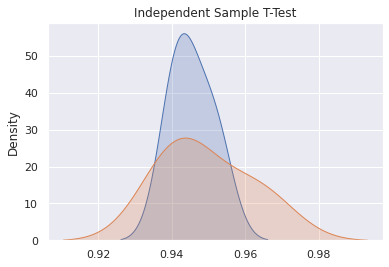

In [228]:
#T-test
#statisticfloat or array
##The calculated t-statistic.

#pvaluefloat or array
##The two-tailed p-value

import numpy as np
from scipy import stats
sns.kdeplot(number_list3, shade=True)
sns.kdeplot(number_list6, shade=True)
plt.title("Independent Sample T-Test")
print("T-test for Model Accuracy",stats.ttest_ind(number_list3,number_list6))

The Blue distribtuion represents that of Descision Tree classsfier and Red distribution represents that of Random Forest classifier.